### Final Project Report STAT 201 Group 4
# Gender Proportion Inference of Suicide Attempts Across Primary Education Level in Shandong, China

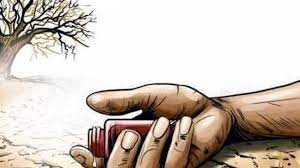

### Group 4: Eric Wei, Laksh Agarwal, Marie Samantha Fidelia, Yiting Sun

## Introduction

In recent years, suicide has become a worldwide public health concern with far-reaching consequences for individuals, community and even the entire society. After accounting for changes in population size and age demographics, there has been a 16% increase in the suicide rate between 2011 and 2022, resulting in an elevation from 12.3 to 14.4 fatalities per 100,000 individuals (Saunders & Panchal, 2023). Therefore, it is important to learn about the factors, triggers, and patterns related to suicide attempts so that they can be prevented effectively. In this project, we will focus on the effect of education levels on suicide risks. We will compare the proportion of suicide rates between primary and secondary education levels for females. A similar research has been done and demonstrated that “Men with a high school education were twice as likely to die by suicide compared with those with a college degree in 2014” (Phillips & Hempstead, 2017); however, we want to examine whether the same pattern will also apply to females.

The data set we chose is “Suicide Attempts in Shandong, China” from Kaggle. This data set records the information of suicide victims from 2009 to 2011 in Shandong, China. The local parameter of interest is the difference in proportion of suicide rate between two categories; which are primary and secondary education level. We will also calculate the standard deviation to investigate the sample variation.

To get started with our project, we will apply statistical inference to a dataset that was obtained from: https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china

The dataset is downloaded in a comma separated format. It contains 2571 rows of data, with 11 columns in which four are continuous variables (person_id, year, month, and age), and the rest are distinct variables. Several missing values are interpreted with an "unknown" label in the dataset. The aspects of education levels include: Iliterate, Primary (Grade 1 - 6), Secondary (Grade 7 - 12), and Tertiary (Bachelor's Degrees, Master's Degrees, and Doctoral Degrees). The following two variables will be considered for use in our inference:

* Sex ("Male"/"Female")
* Education ("Iliterate"/"Primary"/"Secondary"/"Tertiary")

#### Research Question: 
##### Is there a difference between the proportion of the suicide rates of women and men with primary education level?

## Methods and Results

### Reading Our Dataset

We can start by importing the necessary libraries for our modelling

In [22]:
library(tidyverse) # For data cleaning, plotting, etc
library(knitr)     # For table centering and justify
library(infer)     # Calculating simulation-based approaches of inference

Let's read the chosen csv data with its column names into R 

In [3]:
suicide_data <- read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vS0cVcc1RNtcHpY9CnuzkvM_auEuA5HloYBi9MEciadHj4R3uNXNt7ORJwHSJjod85rHzIyigMmVIGy/pub?gid=1118541132&single=true&output=csv", col_names = TRUE) |>
                select(-Number)

glimpse(suicide_data)

Rows: 2571 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): Hospitalised, Died, Urban, Sex, Education, Occupation, method
dbl (5): Number, Person_ID, Year, Month, Age

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,571
Columns: 11
$ Person_ID    <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ Hospitalised <chr> "yes", "no", "no", "no", "yes", "no", "no", "yes", "no", …
$ Died         <chr> "no", "yes", "yes", "yes", "no", "yes", "yes", "no", "yes…
$ Urban        <chr> "no", "no", "no", "no", "no", "no", "no", "no", "no", "no…
$ Year         <dbl> 2010, 2009, 2010, 2011, 2009, 2009, 2010, 2010, 2010, 201…
$ Month        <dbl> 12, 3, 2, 1, 8, 11, 1, 10, 7, 1, 11, 3, 6, 1, 12, 2, 6, 5…
$ Sex          <chr> "female", "male", "male", "male", "male", "male", "female…
$ Age          <dbl> 39, 83, 60, 73, 51, 62, 90, 54, 66, 30, 77, 77, 79, 42, 6…
$ Education    <chr> "Secondary", "Primary", "Primary", "Primary", "Secondary"…
$ Occupation   <chr> "household", "farming", "farming", "farming", "farming", …
$ method       <chr> "Other poison", "Hanging", "Hanging", "Hanging", "Pestici…


### Cleaning and Wrangling Data Into Tidy Format

In [4]:
# Check for missing values in our data
missing <- filter(suicide_data, Education == "unknown") |>
           summarize(n = n())


<div align="center"> Table 1.1: Amount of Rows with Unknown Value 

|   n|
|---:|
| 80 | 

</div>

The tibble above shows that 80 rows are found to be having missing values of education.

Let's select the columns we need and then make sure that we filter out any missing values contained in our data

In [37]:
filtered_data <- suicide_data |>
                 select(Sex, Education) |>
                 filter(Education != "unknown")

<div align="center"> Table 1.2: Head of Filtered Data

<table style='margin-left: auto; margin-right: auto;'>
 <thead>
  <tr>
   <th style="text-align:center;"> Sex </th>
   <th style="text-align:center;"> Education </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:center;"> female </td>
   <td style="text-align:center;"> Secondary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Primary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Secondary </td>
  </tr>
  <tr>
   <td style="text-align:center;"> male </td>
   <td style="text-align:center;"> Iliterate </td>
  </tr>
</tbody>
</table>

</div>

### Visualizing the Data

Now let's visualize the data that we got!

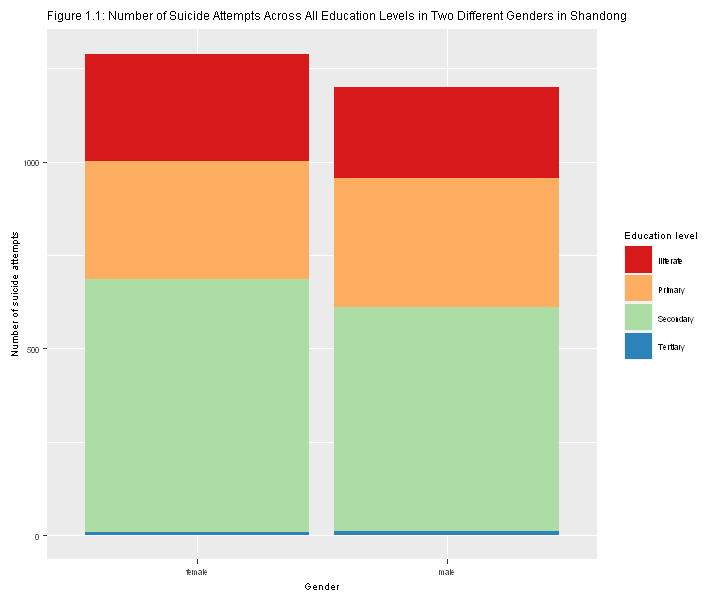

In [6]:
options(repr.plot.width = 6, repr.plot.height = 5)

bar_plot <- filtered_data |>
            ggplot(aes(x = Sex, y = 1, fill = Education)) + 
            geom_bar(stat = "identity", position = "stack") + 
            xlab("Gender") +
            ylab("Number of suicide attempts") +
            labs(fill = "Education level") +
            ggtitle("Figure 1.1: Number of Suicide Attempts Across All Education Levels in Two Different Genders in Shandong") +
            theme(text = element_text(size = 6)) +
            scale_fill_brewer(palette = 'Spectral')
bar_plot

Since students with primary education are our parameters of interest, we will narrow our findings down and select just students with primary education as a part of our research.

### Computing Estimates

In [39]:
prop_table <- filtered_data |>
              filter(Education == "Primary") |>
              summarize(Education = "Primary", n = n(),
              prop_male = sum(Sex == "male")/n,
              prop_female = sum(Sex == "female")/n, 
              total_prop = prop_male + prop_female) 

<div align="center"> Table 1.2: Head of Filtered Data
<table>
 <thead>
  <tr>
   <th style="text-align:left;"> Education </th>
   <th style="text-align:right;"> n </th>
   <th style="text-align:right;"> prop_male </th>
   <th style="text-align:right;"> prop_female </th>
   <th style="text-align:right;"> total_prop </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:left;"> Primary </td>
   <td style="text-align:right;"> 659 </td>
   <td style="text-align:right;"> 0.5235205 </td>
   <td style="text-align:right;"> 0.4764795 </td>
   <td style="text-align:right;"> 1 </td>
  </tr>
</tbody>
</table>

Let's create a visual representation of the above statistics to show a clear comparison!

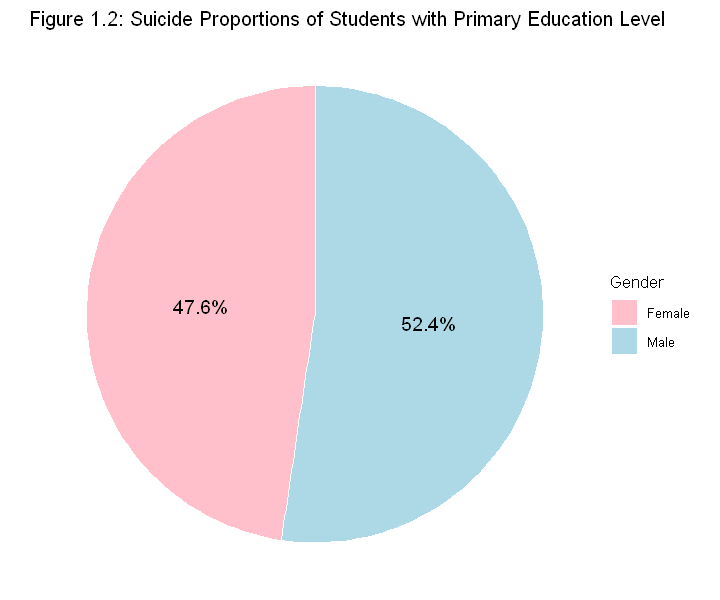

In [64]:
# Create a data frame for male and female proportions
gender_props <- data.frame(
  Gender = c("Male", "Female"),
  Proportion = c(prop_table$prop_male, prop_table$prop_female)
)

# Plotting the pie chart using ggplot2
options(repr.plot.width = 6, repr.plot.height = 5)
props_chart <- ggplot(gender_props, aes(x = "", y = Proportion, fill = Gender)) +
  			   geom_bar(stat = "identity", width = 1, color = "white") +
  			   coord_polar("y") +
  			   theme_void() +
  			   ggtitle("Figure 1.2: Suicide Proportions of Students with Primary Education Level") +
  			   scale_fill_manual(values = c("pink", "lightblue")) +
			   theme(text = element_text(size = 10)) +
   			   geom_text(aes(label = sprintf("%1.1f%%", Proportion * 100)), position = position_stack(vjust = 0.5), size = 4)
props_chart

From the sample that we had, it appears that men with primary education have a higher proportion of suicide attempts (52.4%) than women with primary education (47.6%) in Shandong, China.

### Hypothesis Testing: Comparing the Proportions of Two Independent Populations (Two-Sample Z-Test)

In this report we will produce two ways of checking our final statistic. Since we have seen that males has a higher percentage of committing suicide from the proportions from our sample data, we can alternatively hypothesize that the proportion of male will be higher than that of female with primary education level. Thus, our hypotheses are as such: 
* Null hypothesis: $\widehat{p_{male}} - \widehat{p_{female}} = 0$

* Alternative hypothesis: $\widehat{p_{male}} - \widehat{p_{female}} > 0$

A confidence interval of 95% will be used to estimate the true population parameter. We are using the percentile method to calculate the confidence interval and we will do this by computing the 2.5th and 97.5th percentiles.

1) #### Theory-Based Methods: P-Value

We will first perform an asymptotics hypothesis test to obtain the p-value.

To test for $H_0$, we use the following test statistic:

$$
Z = \frac{\hat{p}_1 - \hat{p}_2}{\sqrt{\hat{p}(1-\hat{p})\left(\frac{1}{n_1} + \frac{1}{n_2}\right)}}
$$
where $\hat{p}_1$ and $\hat{p}_2$ are the sample proportions in samples 1 and 2, respectively; $n$ is the sample size; and $\hat{p}$ is the pooled proportion, given by: 

$$\hat{p} = \frac{n_1\hat{p}_1+n_2\hat{p}_2}{n_1+n_2}$$

<b> (From Worksheet 8 Section 3.4) </b>

Let's calculate the test statistic!

In [56]:
# Calculate the test statistic. Consider the male with a primary education level as sample 1.
p_hat_1 <- mean(filtered_data[filtered_data$Sex == "male", "Education"] == "Primary")
p_hat_2 <- mean(filtered_data[filtered_data$Sex == "female", "Education"] == "Primary")
n1 <- sum(filtered_data$Sex == "male")
n2 <- sum(filtered_data$Sex == "female")
p_hat <- (n1 * p_hat_1 + n2 * p_hat_2) / (n1 + n2)

test_statistic <- (p_hat_1 - p_hat_2) / (p_hat * (1 - p_hat) * (1/n1 + 1/n2))^0.5
test_statistic

[1] 2.47922

Now let's use our test statistic to calculate our one-tailed test for our P-value:

In [57]:
# Calculate the p-value.
p_value <- pnorm(test_statistic,lower.tail = FALSE)
p_value

[1] 0.006583507

The computed p-value is 0.0065835 which is smaller than the chosen significance level (0.05). Hence, this suggests that we can reject our null hypothesis.

2) #### Theory-Based Methods: Confidence Interval

Now let's calculate our confidence intervals for our data!

<b> (From Tutorial 7 Question 4) </b>

In [58]:
p_male <- mean(filtered_data[filtered_data$Sex == "male", "Education"] == "Primary")
p_female <- mean(filtered_data[filtered_data$Sex == "female", "Education"] == "Primary")
n_male <- sum(filtered_data$Sex == "male")
n_female <- sum(filtered_data$Sex == "female")

p_summary <- filtered_data %>% 
             group_by(Sex, Education) %>% 
             summarise(p = n()) %>% 
             group_by(Sex) %>% 
             mutate(n = sum(p), p = p / sum(p)) %>% 
             filter(Education == 'Primary') %>% 
             select(-Education) %>% 
             pivot_wider(names_from = Sex, values_from = c(n,p)) %>%
             mutate(p_diff = p_male - p_female,
                    p_diff_std_error = sqrt(p_male*(1-p_male)/n_male + p_female*(1-p_female)/n_female),
					lower_ci = qnorm(0.025, p_diff, p_diff_std_error),
                    upper_ci = qnorm(0.975, p_diff, p_diff_std_error))

`summarise()` has grouped output by 'Sex'. You can override using the `.groups`
argument.


<div align="center"> Table 1.3: 95% Confidence Interval Obtained by CLT
<table>
 <thead>
  <tr>
   <th style="text-align:right;"> n_female </th>
   <th style="text-align:right;"> n_male </th>
   <th style="text-align:right;"> p_female </th>
   <th style="text-align:right;"> p_male </th>
   <th style="text-align:right;"> p_diff </th>
   <th style="text-align:right;"> p_diff_std_error </th>
   <th style="text-align:right;"> lower_ci </th>
   <th style="text-align:right;"> upper_ci </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 1290 </td>
   <td style="text-align:right;"> 1201 </td>
   <td style="text-align:right;"> 0.2434109 </td>
   <td style="text-align:right;"> 0.2872606 </td>
   <td style="text-align:right;"> 0.0438498 </td>
   <td style="text-align:right;"> 0.0176985 </td>
   <td style="text-align:right;"> 0.0091613 </td>
   <td style="text-align:right;"> 0.0785382 </td>
  </tr>
</tbody>
</table>

From asymptotics calculation, we are 95% confident that the true difference in proportion between male and female lies in the interval: [0.009161309, 0.07853822].

3) #### Simulation-Based Methods: P-Value

We will now perform a bootstrapping hypothesis test and compare the result computed from previous method.

Using the infer library, we can get our test statistic as such:

In [49]:
# Set our seed to 123
set.seed(123)

filtered_data_binary_education <- filtered_data
filtered_data_binary_education$Education[filtered_data_binary_education$Education != "Primary"] <- "Not Primary"

obs_diff_prop <- filtered_data_binary_education %>% 
  specify(Education ~ Sex, success = "Primary") %>% 
  calculate(stat = "diff in props", order = c("male", "female"))

<div align="center"> Table 1.4: Difference in suicide proportions between male and female
<table>
 <thead>
  <tr>
   <th style="text-align:right;"> stat </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 0.0438498 </td>
  </tr>
</tbody>
</table>

Then let's calculate our p-value using the infer library:

In [52]:
pval <- get_p_value(null_distribution, obs_stat = obs_diff_prop, direction = "right")

<div align="center"> Table 1.5: Simulation-based p-value
<table>
 <thead>
  <tr>
   <th style="text-align:right;"> p_value </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 0.011 </td>
  </tr>
</tbody>
</table>

Now let's visualize our distribution along with our p-value!

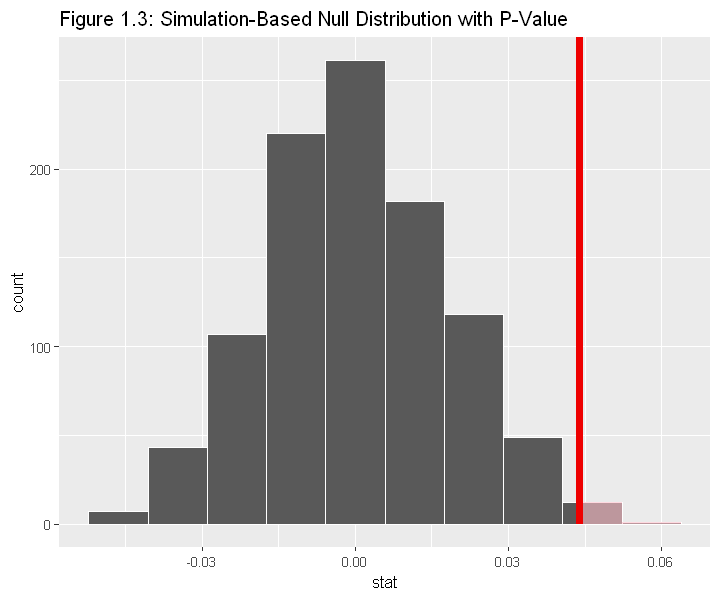

In [65]:
options(repr.plot.width = 6, repr.plot.height = 5)
pval_plot <- null_distribution %>% 
             visualize(bins = 10) + 
             shade_p_value(obs_stat = obs_diff_prop, direction = "right") +
			 theme(text = element_text(size = 10)) +
		     ggtitle("Figure 1.3: Simulation-Based Null Distribution with P-Value")
pval_plot

The computed p-value is 0.011 which is also smaller than the chosen significance level (0.05). Hence, this suggests that we can reject our null hypothesis.

4) #### Simulation-Based Methods: Confidence Interval

We will first create a bootstrap distribution and find our p-value using the infer package.

In [62]:
# Set our seed to 123
set.seed(123)
bootstrap_dist <- filtered_data_binary_education %>% 
                  specify(formula = Education ~ Sex, success = "Primary") %>% 
                  generate(reps = 1000, type = "bootstrap") %>% 
                  calculate(stat = "diff in props", order = c("male", "female"))

percentile_ci <- bootstrap_dist %>% 
                 get_confidence_interval(level = 0.95, type = "percentile")

<div align="center"> Table 1.6: Simulation-based 95% confidence interval
<table>
 <thead>
  <tr>
   <th style="text-align:right;"> lower_ci </th>
   <th style="text-align:right;"> upper_ci </th>
  </tr>
 </thead>
<tbody>
  <tr>
   <td style="text-align:right;"> 0.01044904 </td>
   <td style="text-align:right;"> 0.0786931 </td>
  </tr>
</tbody>
</table>

We are 95% confident that the true difference in proportion between males and females lies between the interval: [0.01044904, 0.0786931].

Now let's visualize our bootstrap distribution along with our confidence intervals!

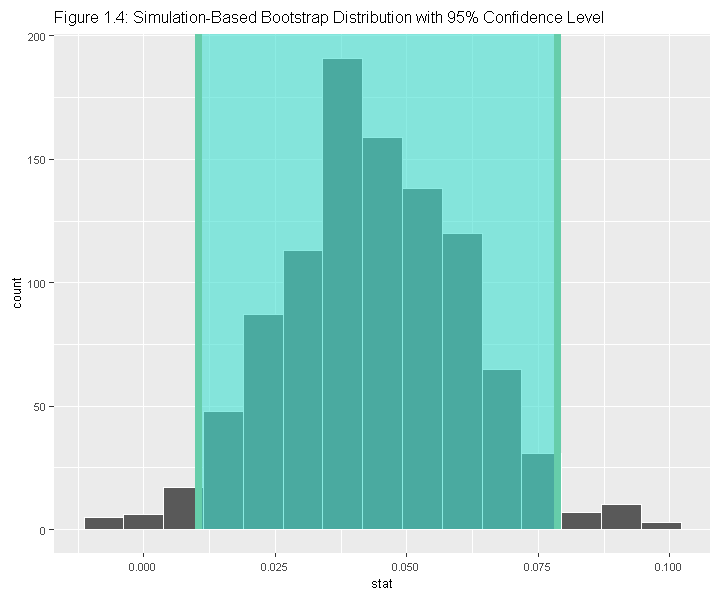

In [67]:
options(repr.plot.width = 6, repr.plot.height = 5)
ci_plot <- visualize(bootstrap_dist) + 
           shade_confidence_interval(endpoints = percentile_ci) +
		   theme(text = element_text(size = 8)) +
		   ggtitle("Figure 1.4: Simulation-Based Bootstrap Distribution with 95% Confidence Level")
ci_plot

### Asymptotic vs Bootstrapping: Which One's Better?

After conducting both methods for hypothesis tests and confidence intervals, we found that the p-value obtained using the simulation-based method is higher than the value calculated with asymptotics, but still with small enough p-values to both reject our null hypothesis. On the other hand, the confidence interval values show relatively similar values of lower and upper limits using both the asymptotic and simulation-based approach.

## Discussion

* Summarize what you found, and the implications/impact of your findings.
* Discuss whether your results were what you expected to find.
* Discuss future questions/research this study could lead to.

## References

Heather Saunders and Nirmita Panchal. (2023, August 21). A look at the latest suicide data and change over the last decade. *KFF*. https://www.kff.org/mental-health/issue-brief/a-look-at-the-latest-suicide-data-and-change-over-the-last-decade/

Phillips, J. A., & Hempstead, K. (2017). Differences in U.S. suicide rates by educational attainment, 2000–2014. *American Journal of Preventive Medicine, 53(4)*. https://doi.org/10.1016/j.amepre.2017.04.010

Scholaro Database. (2023). Education system in China. *China Education System. (n.d.)*. https://www.scholaro.com/db/Countries/China/Education-System

Singh, U. (2023, May 6). *Suicide attempts in Shandong, China*. Kaggle. https://www.kaggle.com/datasets/utkarshx27/suicide-attempts-in-shandong-china